In [1]:
# Importando as bibliotecas

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LogisticRegression


In [2]:
# Carregando a base de dados e verificando-a.

base_cc = pd.read_csv("cc_approvals.data", header = None)



### EDA

In [3]:
print(base_cc.head())
print("\n")
print(base_cc.tail(20))
print("\n")
print(base_cc.shape)
print("\n")
print(base_cc.info())

  0      1      2  3  4  5  6     7  8  9   10 11 12     13   14 15
0  b  30.83  0.000  u  g  w  v  1.25  t  t   1  f  g  00202    0  +
1  a  58.67  4.460  u  g  q  h  3.04  t  t   6  f  g  00043  560  +
2  a  24.50  0.500  u  g  q  h  1.50  t  f   0  f  g  00280  824  +
3  b  27.83  1.540  u  g  w  v  3.75  t  t   5  t  g  00100    3  +
4  b  20.17  5.625  u  g  w  v  1.71  t  f   0  f  s  00120    0  +


    0      1       2  3  4   5   6      7  8  9   10 11 12     13   14 15
670  b  47.17   5.835  u  g   w   v  5.500  f  f   0  f  g  00465  150  -
671  b  25.83  12.835  u  g  cc   v  0.500  f  f   0  f  g  00000    2  -
672  a  50.25   0.835  u  g  aa   v  0.500  f  f   0  t  g  00240  117  -
673  ?  29.50   2.000  y  p   e   h  2.000  f  f   0  f  g  00256   17  -
674  a  37.33   2.500  u  g   i   h  0.210  f  f   0  f  g  00260  246  -
675  a  41.58   1.040  u  g  aa   v  0.665  f  f   0  f  g  00240  237  -
676  a  30.58  10.665  u  g   q   h  0.085  f  t  12  t  g  00129    3  

In [4]:
#verificando valores unicos em cada coluna
for coluna in base_cc.columns:
    valores_unicos=base_cc[coluna].unique()
    print(f'os valores unicos da colluna {coluna} sao {valores_unicos}')

os valores unicos da colluna 0 sao ['b' 'a' '?']
os valores unicos da colluna 1 sao ['30.83' '58.67' '24.50' '27.83' '20.17' '32.08' '33.17' '22.92' '54.42'
 '42.50' '22.08' '29.92' '38.25' '48.08' '45.83' '36.67' '28.25' '23.25'
 '21.83' '19.17' '25.00' '47.75' '27.42' '41.17' '15.83' '47.00' '56.58'
 '57.42' '42.08' '29.25' '42.00' '49.50' '36.75' '22.58' '27.25' '23.00'
 '27.75' '54.58' '34.17' '28.92' '29.67' '39.58' '56.42' '54.33' '41.00'
 '31.92' '41.50' '23.92' '25.75' '26.00' '37.42' '34.92' '34.25' '23.33'
 '23.17' '44.33' '35.17' '43.25' '56.75' '31.67' '23.42' '20.42' '26.67'
 '36.00' '25.50' '19.42' '32.33' '34.83' '38.58' '44.25' '44.83' '20.67'
 '34.08' '21.67' '21.50' '49.58' '27.67' '39.83' '?' '37.17' '25.67'
 '34.00' '49.00' '62.50' '31.42' '52.33' '28.75' '28.58' '22.50' '28.50'
 '37.50' '35.25' '18.67' '54.83' '40.92' '19.75' '29.17' '24.58' '33.75'
 '25.42' '37.75' '52.50' '57.83' '20.75' '39.92' '24.75' '44.17' '23.50'
 '47.67' '22.75' '34.42' '28.42' '67.75' '47

_____________________________________________________

In [5]:
# Verificando os valores faltantes

print(base_cc.isnull().any())
print(base_cc.isna().any())

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
dtype: bool
0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
dtype: bool


In [6]:
#contabilizando valores ausentes(%)
(base_cc=="?").mean()*100

0     1.739130
1     1.739130
2     0.000000
3     0.869565
4     0.869565
5     1.304348
6     1.304348
7     0.000000
8     0.000000
9     0.000000
10    0.000000
11    0.000000
12    0.000000
13    1.884058
14    0.000000
15    0.000000
dtype: float64

### pré processamento 

In [7]:
# Substituindo as "?" e verificando se està tudo ok
base_cc = base_cc.replace("?",np.NaN)

print("\n")
print(base_cc.tail(20))



      0      1       2  3  4   5   6      7  8  9   10 11 12     13   14 15
670    b  47.17   5.835  u  g   w   v  5.500  f  f   0  f  g  00465  150  -
671    b  25.83  12.835  u  g  cc   v  0.500  f  f   0  f  g  00000    2  -
672    a  50.25   0.835  u  g  aa   v  0.500  f  f   0  t  g  00240  117  -
673  NaN  29.50   2.000  y  p   e   h  2.000  f  f   0  f  g  00256   17  -
674    a  37.33   2.500  u  g   i   h  0.210  f  f   0  f  g  00260  246  -
675    a  41.58   1.040  u  g  aa   v  0.665  f  f   0  f  g  00240  237  -
676    a  30.58  10.665  u  g   q   h  0.085  f  t  12  t  g  00129    3  -
677    b  19.42   7.250  u  g   m   v  0.040  f  t   1  f  g  00100    1  -
678    a  17.92  10.210  u  g  ff  ff  0.000  f  f   0  f  g  00000   50  -
679    a  20.08   1.250  u  g   c   v  0.000  f  f   0  f  g  00000    0  -
680    b  19.50   0.290  u  g   k   v  0.290  f  f   0  f  g  00280  364  -
681    b  27.83   1.000  y  p   d   h  3.000  f  f   0  f  g  00176  537  -
682    b  

In [8]:
# Verificando os valores faltantes
(base_cc.isna()).mean().sort_values(ascending=False)*100

13    1.884058
0     1.739130
1     1.739130
5     1.304348
6     1.304348
3     0.869565
4     0.869565
2     0.000000
7     0.000000
8     0.000000
9     0.000000
10    0.000000
11    0.000000
12    0.000000
14    0.000000
15    0.000000
dtype: float64

In [9]:
# Lidando com os NaNs anteriores

base_cc = base_cc.fillna(method = 'ffill')

print(base_cc.count())
base_cc.tail(20)

0     690
1     690
2     690
3     690
4     690
5     690
6     690
7     690
8     690
9     690
10    690
11    690
12    690
13    690
14    690
15    690
dtype: int64


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
670,b,47.17,5.835,u,g,w,v,5.500,f,f,0,f,g,00465,150,-
671,b,25.83,12.835,u,g,cc,v,0.500,f,f,0,f,g,00000,2,-
672,a,50.25,0.835,u,g,aa,v,0.500,f,f,0,t,g,00240,117,-
673,a,29.50,2.000,y,p,e,h,2.000,f,f,0,f,g,00256,17,-
674,a,37.33,2.500,u,g,i,h,0.210,f,f,0,f,g,00260,246,-
675,a,41.58,1.040,u,g,aa,v,0.665,f,f,0,f,g,00240,237,-
676,a,30.58,10.665,u,g,q,h,0.085,f,t,12,t,g,00129,3,-
677,b,19.42,7.250,u,g,m,v,0.040,f,t,1,f,g,00100,1,-
678,a,17.92,10.210,u,g,ff,ff,0.000,f,f,0,f,g,00000,50,-
679,a,20.08,1.250,u,g,c,v,0.000,f,f,0,f,g,00000,0,-


In [10]:
# confirmando se a imputaçao teve sucesso
(base_cc.isna()).mean().sort_values(ascending=False)*100

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
dtype: float64

In [11]:
# A variavel numero 13 parece um CEP. Vamos remove-la primeiro

base_cc = base_cc.drop([base_cc.columns[13]], axis = 1)

base_cc.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,0,+


In [12]:
# Agora vamos ajustar os nomes das colunas

base_cc.columns = ["var1","var2","var3","var4","var5","var6"
                   ,"var7","var8","var9","var10","var11","var12","var13","var14","alvo"]


In [13]:
base_cc.head(1)

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,alvo
0,b,30.83,0.0,u,g,w,v,1.25,t,t,1,f,g,0,+


## engenharia de atributos

In [14]:
# Usando o LabelEncoder
encoder = LabelEncoder()

# Percorrendo e transformando toda a base de dados
for variaveis in base_cc.columns:
    if base_cc[variaveis].dtype == 'object':
        base_cc[variaveis] = encoder.fit_transform(base_cc[variaveis])

In [15]:
base_cc.head()

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,alvo
0,1,156,0.000,1,0,12,7,1.25,1,1,1,0,0,0,0
1,0,328,4.460,1,0,10,3,3.04,1,1,6,0,0,560,0
2,0,89,0.500,1,0,10,3,1.50,1,0,0,0,0,824,0
3,1,125,1.540,1,0,12,7,3.75,1,1,5,1,0,3,0
4,1,43,5.625,1,0,12,7,1.71,1,0,0,0,2,0,0


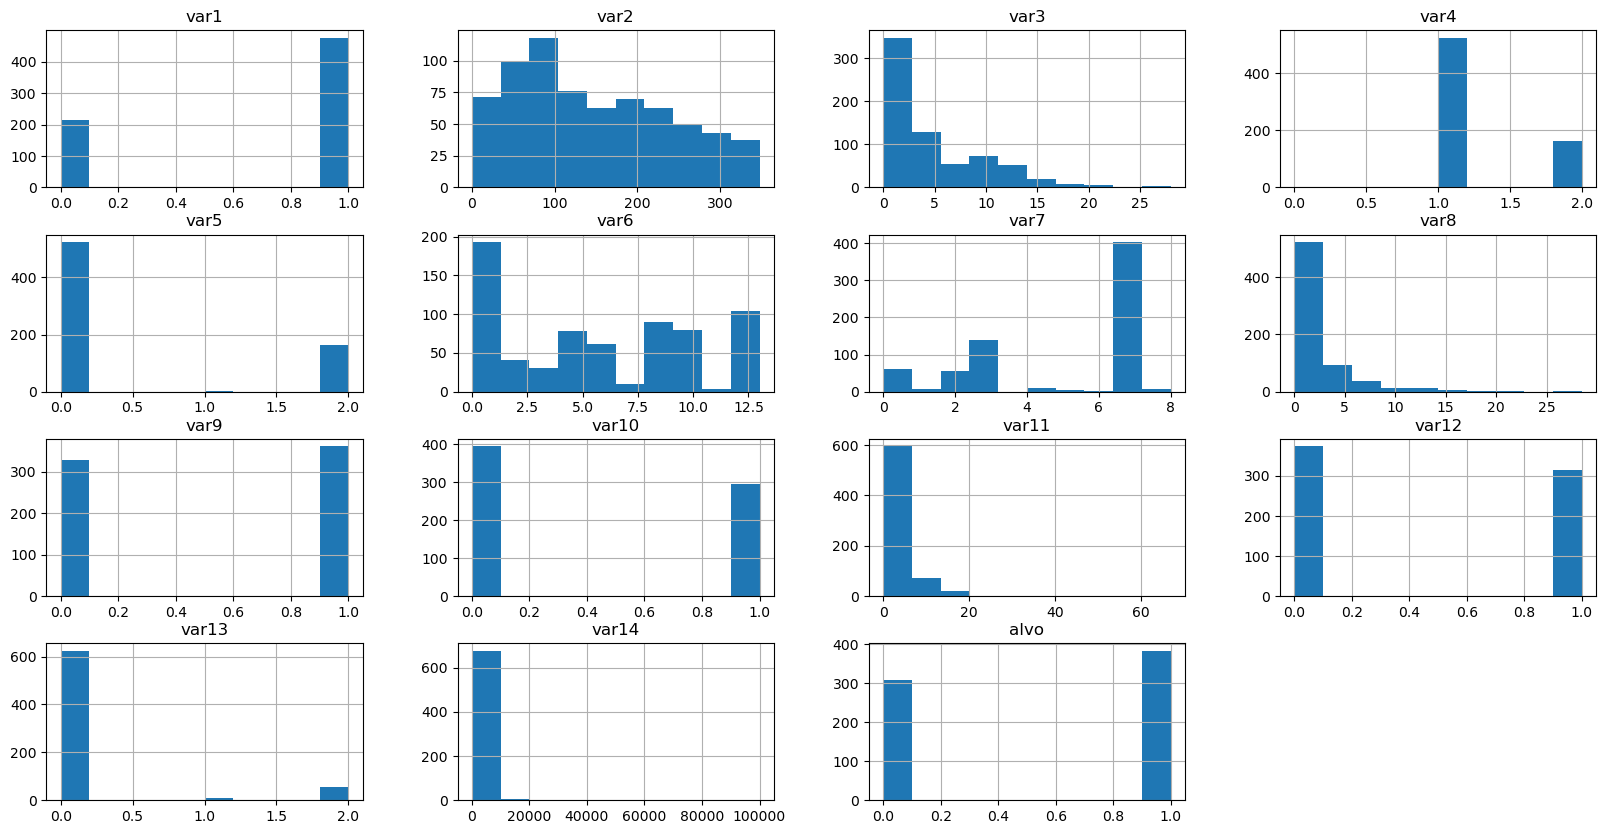

In [16]:
# Como todas as variàveis sao numericas, vamos plotar seus respectivos histogramas
base_cc.hist()
plt.gcf().set_size_inches(20, 10)

In [17]:
# ANALISANDO MULTICOLINEARIDADE
correlation_matrix = base_cc.corr()
# Verificando as correlações fortes 
strong_correlations = (correlation_matrix > 0.7) & (correlation_matrix < 1.0)
# Identificando as criáveis com multicolinearidade
multicollinear_vars = set()
for col in strong_correlations.columns:
    correlated_vars = strong_correlations.index[strong_correlations[col]]
    if len(correlated_vars) > 1:
        multicollinear_vars.update(correlated_vars)

if multicollinear_vars:
    print("\nVariáveis com multicolinearidade:{}".format(multicollinear_vars))
    
else:
    print("\nNão foi encontrada multicolinearidade entre as variáveis.")


Não foi encontrada multicolinearidade entre as variáveis.


### divindo os dados de treino e teste

In [18]:
# Separando os dados com as variaveis em x e o alvo em y

x = base_cc.drop("alvo", axis = 1)
y = base_cc["alvo"]

# Separando entre treinamento e teste

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.5, random_state = 42)

_____________________________________________________

### Treinamento da Regressao Logistica 

In [19]:
# Inicialize o modelo de regressão logística
modelo = LogisticRegression()
modelo.fit(x_treino, y_treino)




C:\Users\campe\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
# Fazer previsões nos dados de teste
y_pred = modelo.predict(x_teste)

_____________________________________________________

## Avaliaçao do modelo

In [21]:
# Calcule a acurácia
acuracia = metrics.accuracy_score(y_teste, y_pred)
print(f'a acurácia do seu modelo é de {acuracia}')

a acurácia do seu modelo é de 0.8318840579710145
